# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [5]:
hdu = fits.open('480_2018_.Flat.0S0X1.R.16.fits')
header = hdu[0].header
print(header['exptime'])

0.5


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [6]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('480_2018_.Flat.0S0X1.R.16.fits')
print(flat_list)

['480_2018_.Flat.0S0X1.R.16.fits']


Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [11]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open('480_2018_.Flat.45S0X1.R.26.fits')
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 45.0 sec
Mean counts: 21377.88



## Plot mean counts versus exposure time


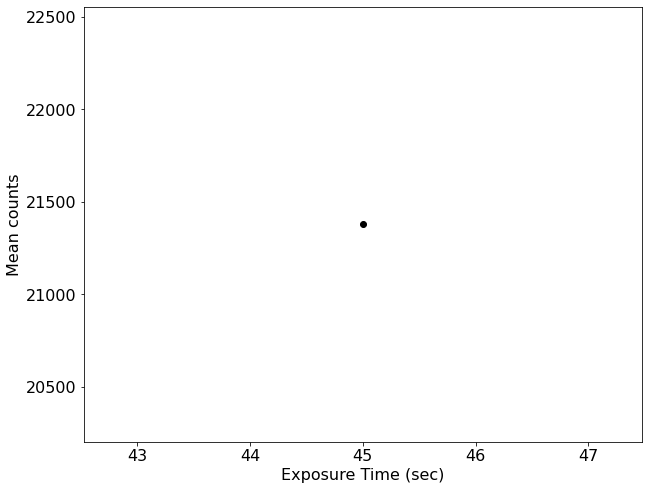

In [12]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()